### __author__: anmol_durgapal

In [1]:
## import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## set pandas display option
pd.set_option("display.max_rows", 1500)

In [3]:
## useful script 
%run ../src/utils_io.py
%run ../src/utils_viz.py

In [124]:
## read in the dataset
sales_data = pd.read_excel("../data/sales_data.xlsx")
dates = pd.read_excel("../data/date.xlsx")

In [5]:
## shape of the datasets
sales_data.shape, dates.shape

((541909, 8), (541909, 6))

In [6]:
## first few rows -- sales_data
sales_data.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
## first few rows -- dates
dates.head(5)

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [8]:
## concat both the dataset and make new columns
df = make_df(sales_data, dates)

In [9]:
## shape of dataframe
df.shape

(541909, 14)

In [10]:
## first few rows -- df
df.head()

,transaction id,customer id,product id,product description,quantity sold,unit price,sales,transaction country,year,month,day_of_month,day_name,hour,minute
0,536365,17850.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom,2010,12,1,3,8,26
1,536365,17850.0,71053,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom,2010,12,1,3,8,26
2,536365,17850.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom,2010,12,1,3,8,26
3,536365,17850.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom,2010,12,1,3,8,26
4,536365,17850.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom,2010,12,1,3,8,26


In [30]:
import dataframe_image as dfi

df_styled = df.head()
dfi.export(df_styled, "img.png", table_conversion='chrome', fontsize=15)

In [11]:
## save the data
df.to_pickle("../data/main_df.pkl")

In [4]:
## load the main_df here
df = pd.read_pickle("../data/main_df.pkl")

In [5]:
## dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
transaction id         541909 non-null object
customer id            406829 non-null float64
product id             541909 non-null object
product description    540455 non-null object
quantity sold          541909 non-null int64
unit price             541909 non-null float64
sales                  541909 non-null float64
transaction country    541909 non-null object
year                   541909 non-null int64
month                  541909 non-null int64
day_of_month           541909 non-null int64
day_name               541909 non-null int64
hour                   541909 non-null int64
minute                 541909 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 57.9+ MB


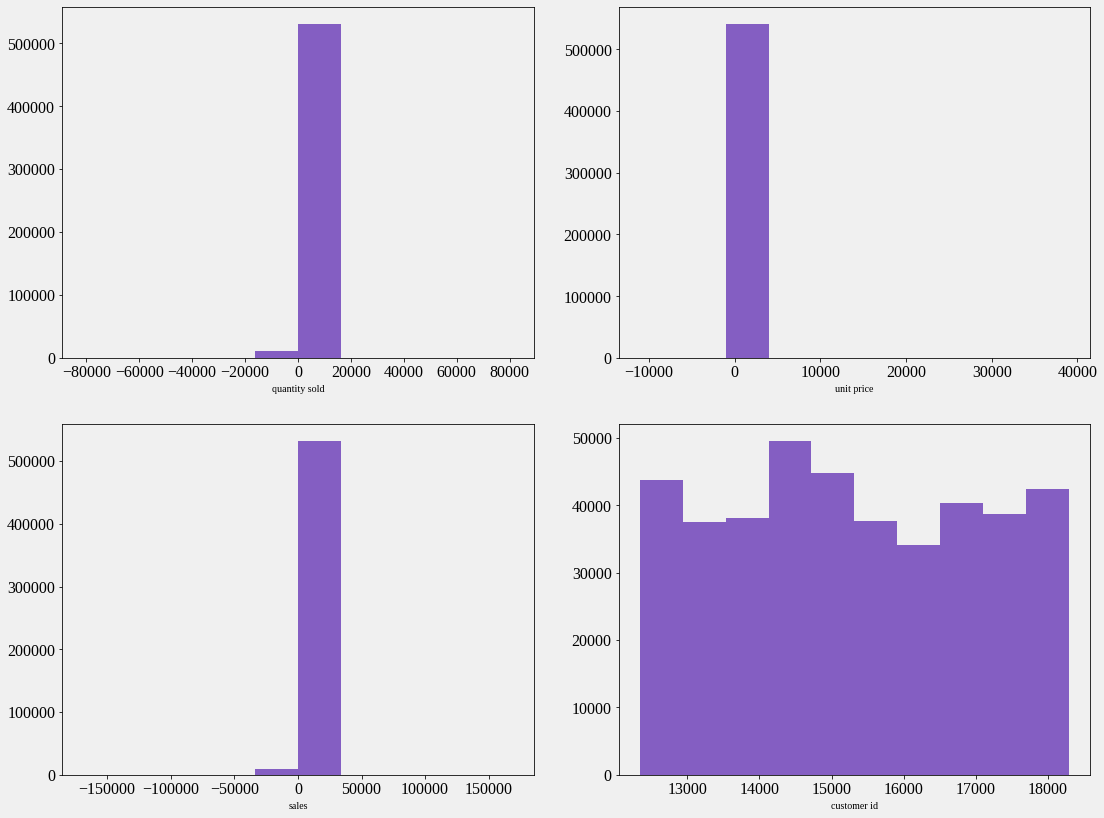

In [123]:
## plot distribution -- for a few columns
fig, ax = plot_distribution(
    df[[
        "quantity sold", "unit price", "sales", "customer id"
       ]],
    2, 2, figsize=(16,12), filename="../plots/1_distribution.jpg"
)

In [5]:
## only include positive values
df = df.loc[
    df["unit price"] > 0.0
]

df = df.loc[
    df["quantity sold"] > 0.0
]

## reset index
df = df.reset_index(drop=True)

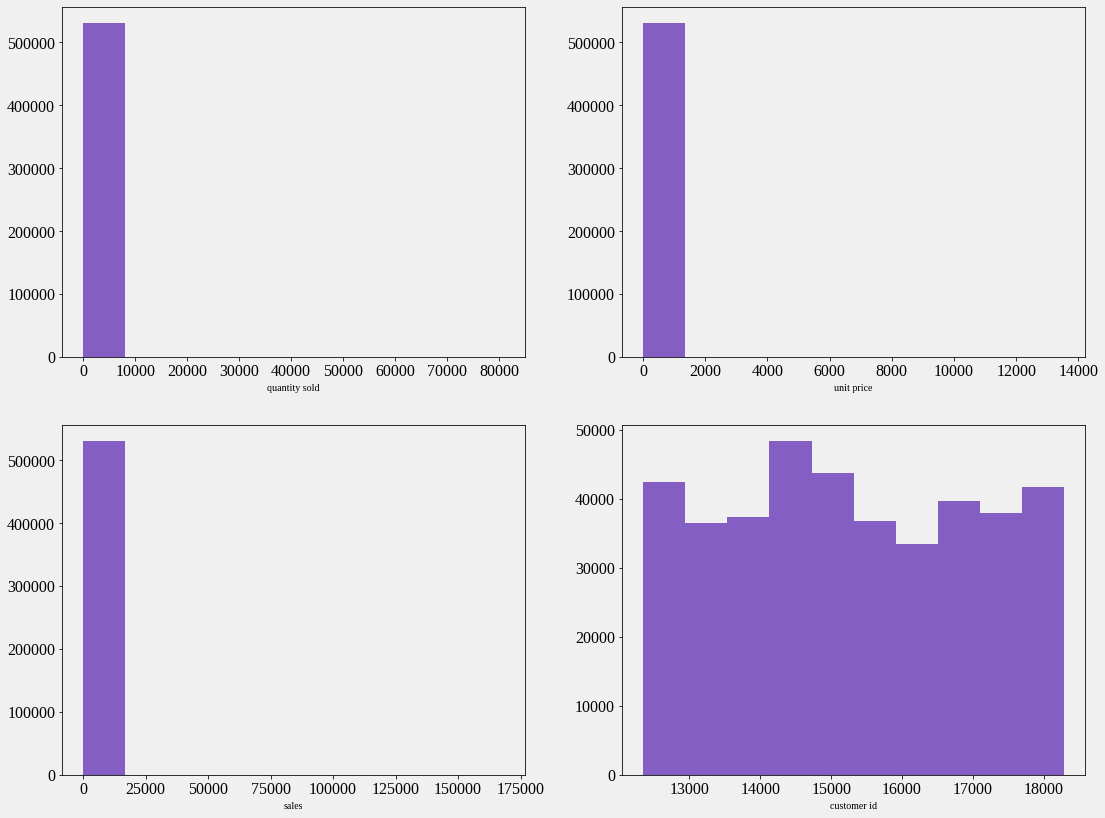

In [125]:
## plot distribution -- for a few columns
fig, ax = plot_distribution(
    df[[
        "quantity sold", "unit price", "sales", "customer id"
       ]],
    2, 2, figsize=(16,12), filename="../plots/2_clean_distribution.jpg"
)

In [101]:
## shape
df.shape

(530104, 14)

In [126]:
## check for null values -- sales_data
df.isna().sum()

transaction id              0
customer id            132220
product id                  0
product description         0
quantity sold               0
unit price                  0
sales                       0
transaction country         0
year                        0
month                       0
day_of_month                0
day_name                    0
hour                        0
minute                      0
dtype: int64

In [127]:
## percent of null values
per_null(df)

transaction id         0.000000
customer id            0.249423
product id             0.000000
product description    0.000000
quantity sold          0.000000
unit price             0.000000
sales                  0.000000
transaction country    0.000000
year                   0.000000
month                  0.000000
day_of_month           0.000000
day_name               0.000000
hour                   0.000000
minute                 0.000000
dtype: float64

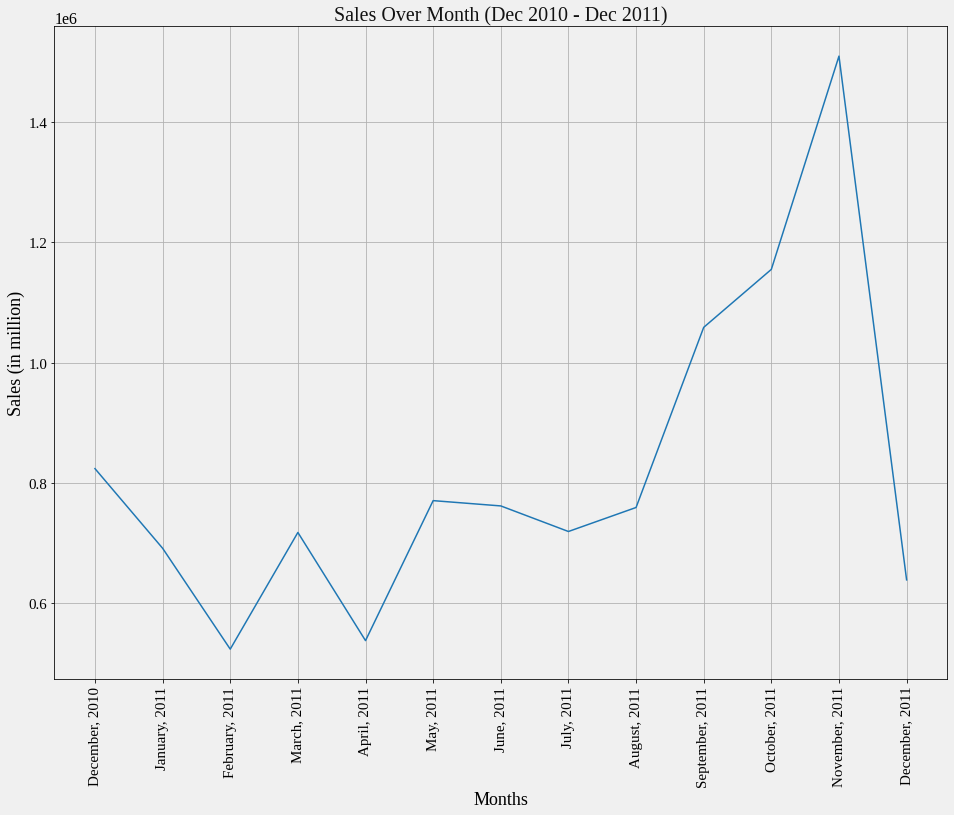

In [104]:
## plot sales over month
fig, ax = sales_over_month(df, (16,12), False, "../plots/3_sales_over_months.jpg")

(<Figure size 1152x864 with 1 Axes>,
 <AxesSubplot:title={'center':'Sales Over Month (Dec 2010 - Dec 2011)'}, xlabel='Months', ylabel='Sales (in million)'>)

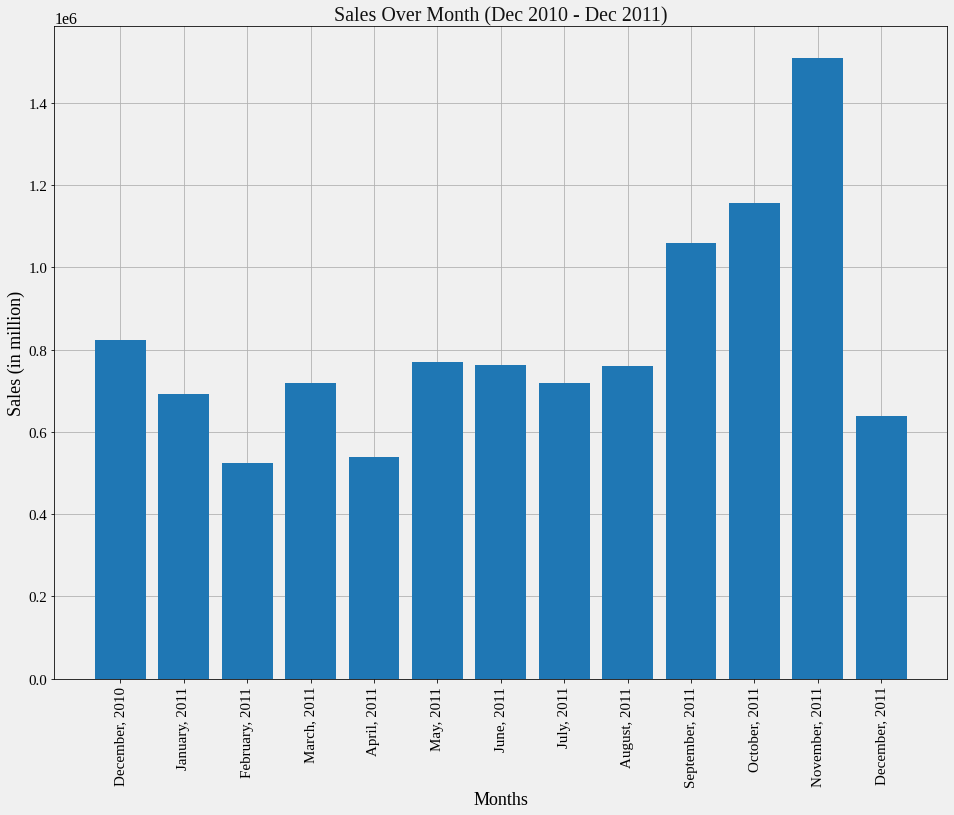

In [105]:
sales_over_month(df, (16,12), True, "../plots/4_sales_over_month_bar.jpg")

In [10]:
%run ../src/utils_viz.py

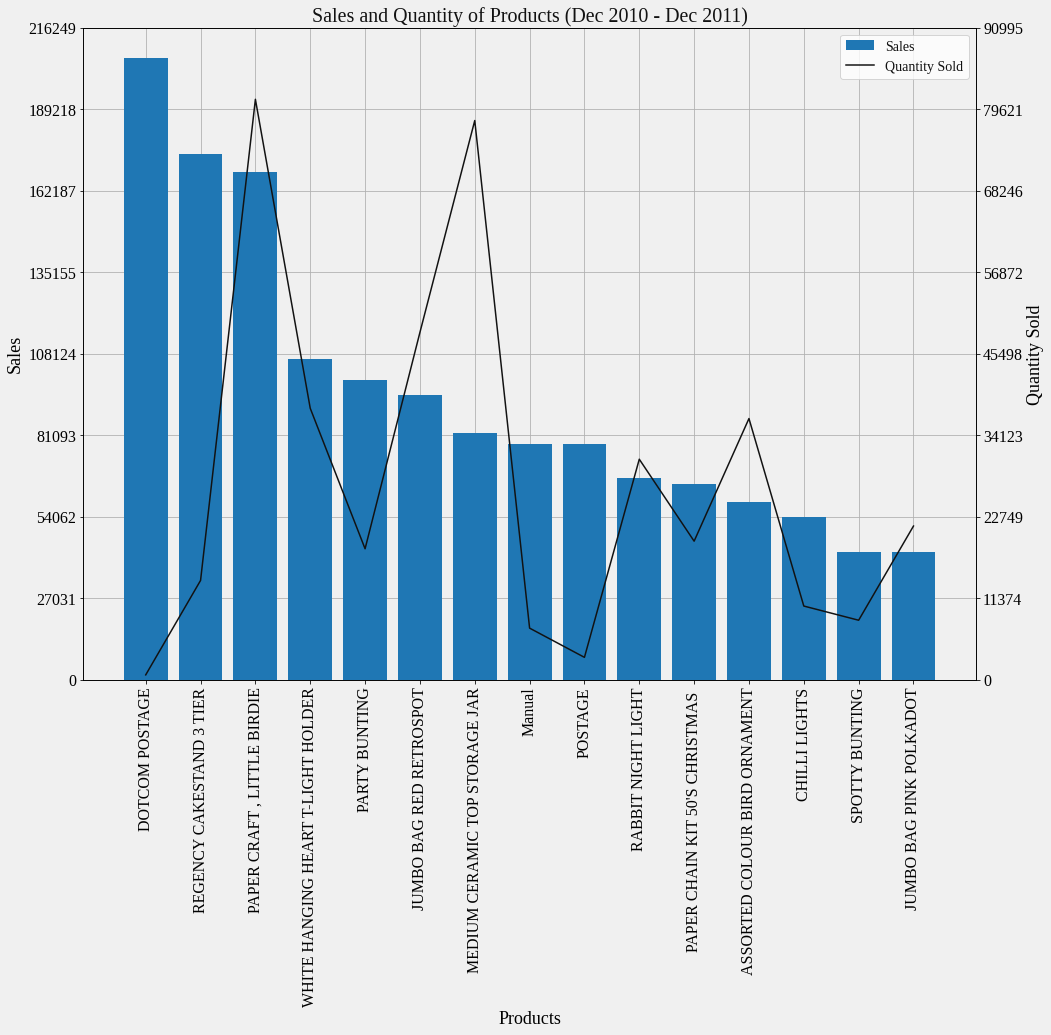

In [11]:
## sales and quantity of products
fig, ax = plot_two_axis(
    df, "product description", "sales", "quantity sold", 
    ["Products", "Sales", "Quantity Sold", 
     "Sales and Quantity of Products (Dec 2010 - Dec 2011)"],
    (16,12), filename="../plots/5_sales_and_quantity.jpg"
)

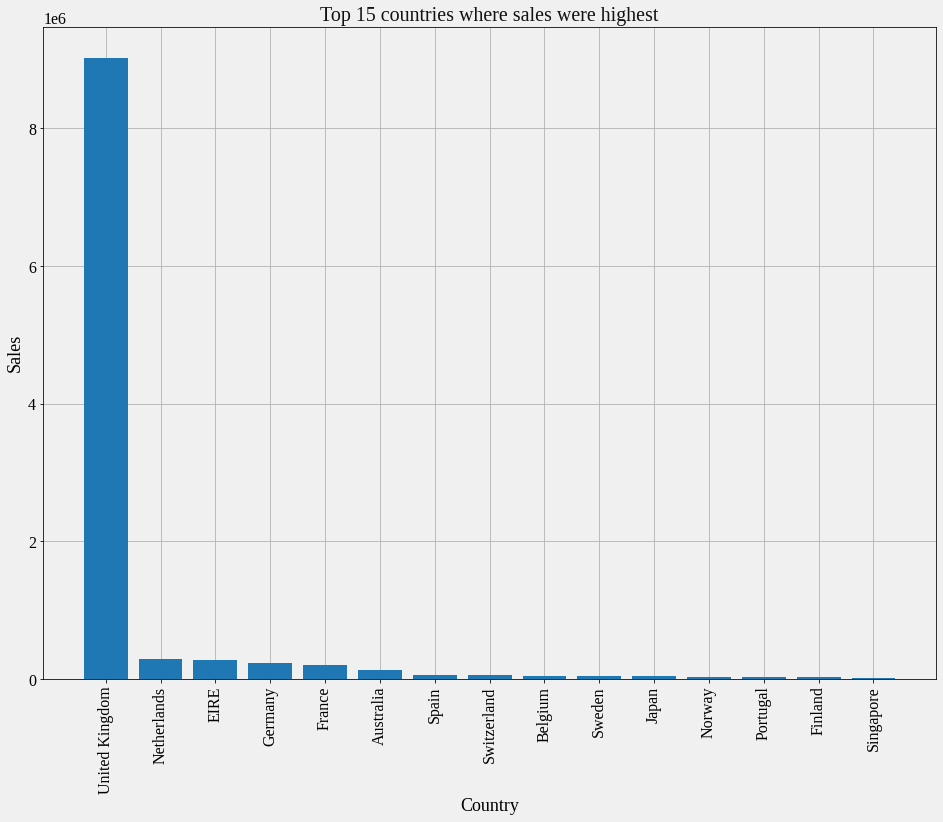

In [107]:
## top 15 countries
fig, ax = make_bar( 
    df, "transaction country", "sales",
    ["Country", "Sales", "Top 15 countries where sales were highest"],
    figsize=(16,12), filename="../plots/6_top15_countries.jpg"
)

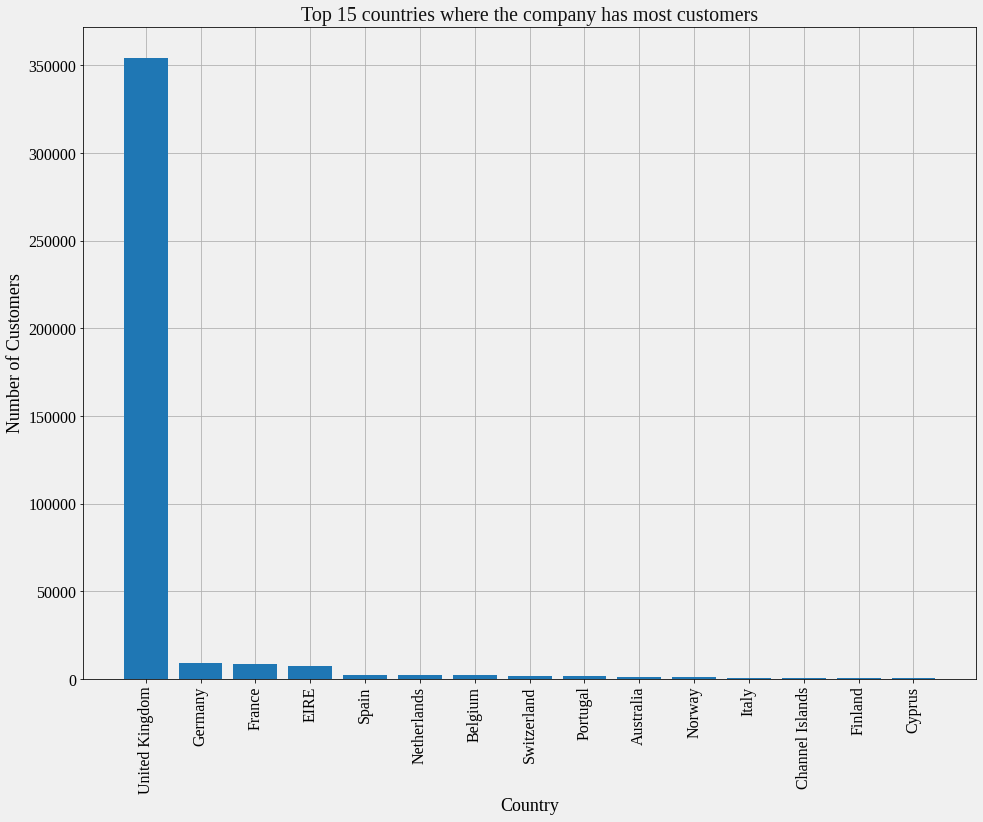

In [108]:
## customer in countries
fig, ax = make_bar( 
    df, "transaction country", "customer id",
    ["Country", "Number of Customers", "Top 15 countries where the company has most customers"],
    func="count", figsize=(16,12), filename="../plots/7_top15_customers.jpg"
)

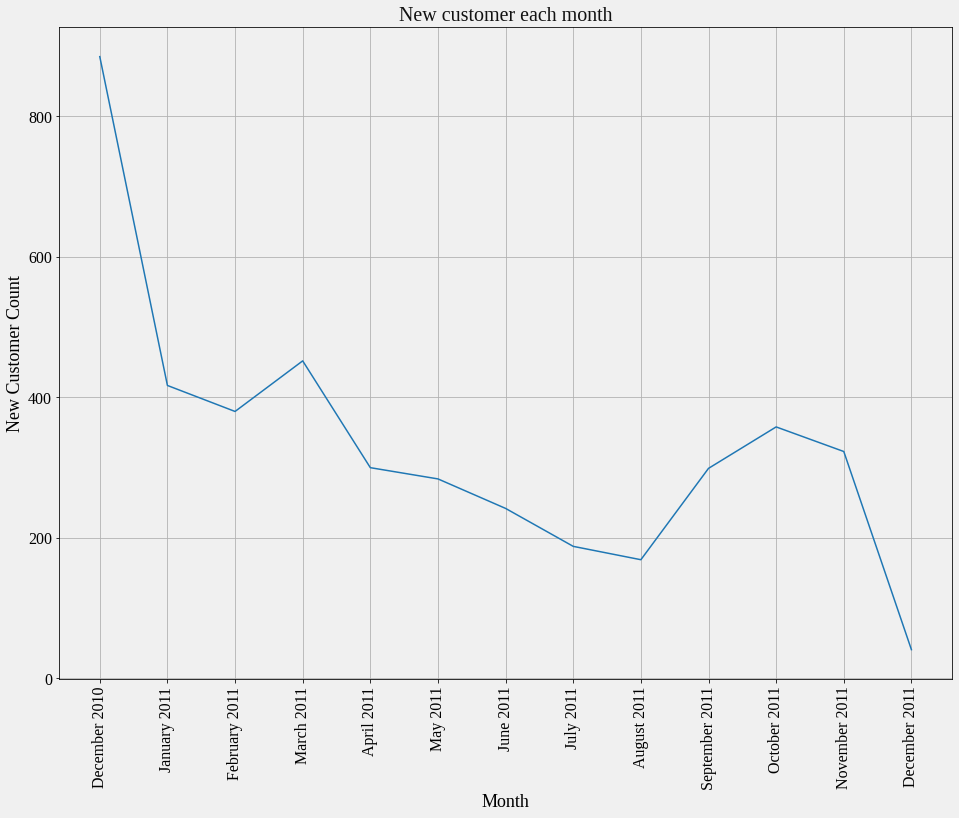

In [109]:
fig, ax, new_cus = new_customer(df, (16,12), "../plots/8_new_customers.jpg")

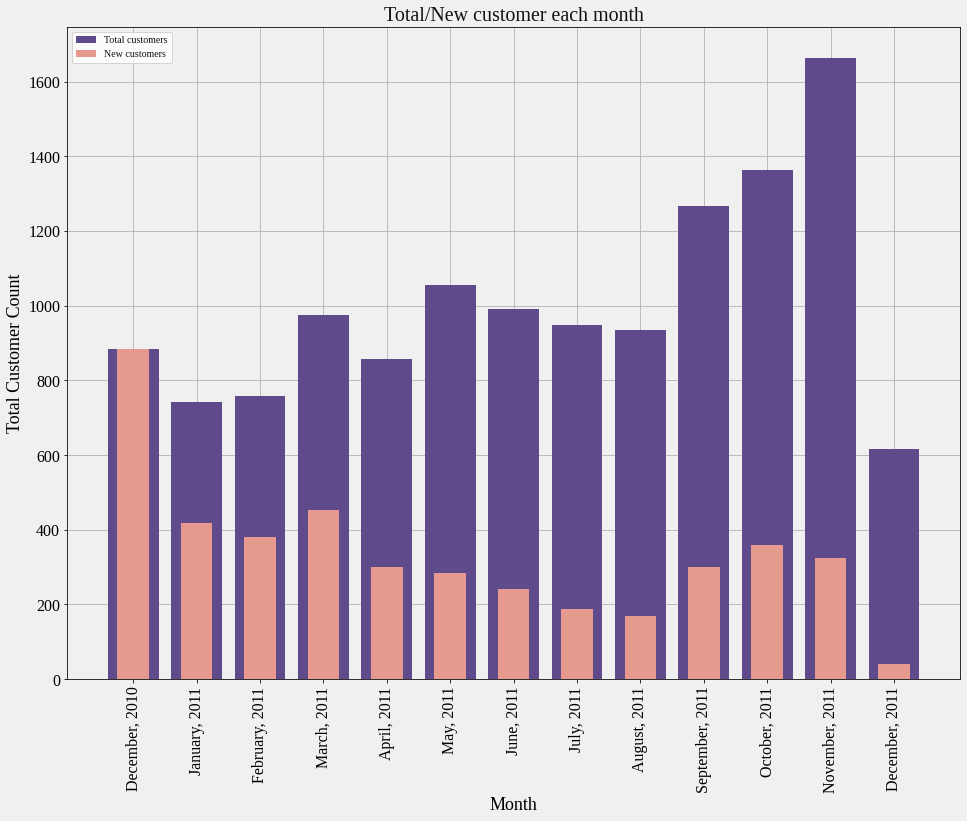

In [111]:
fig, ax = customers_month(df, new_cus, (16,12), "../plots/9_tot_new_customer.jpg")

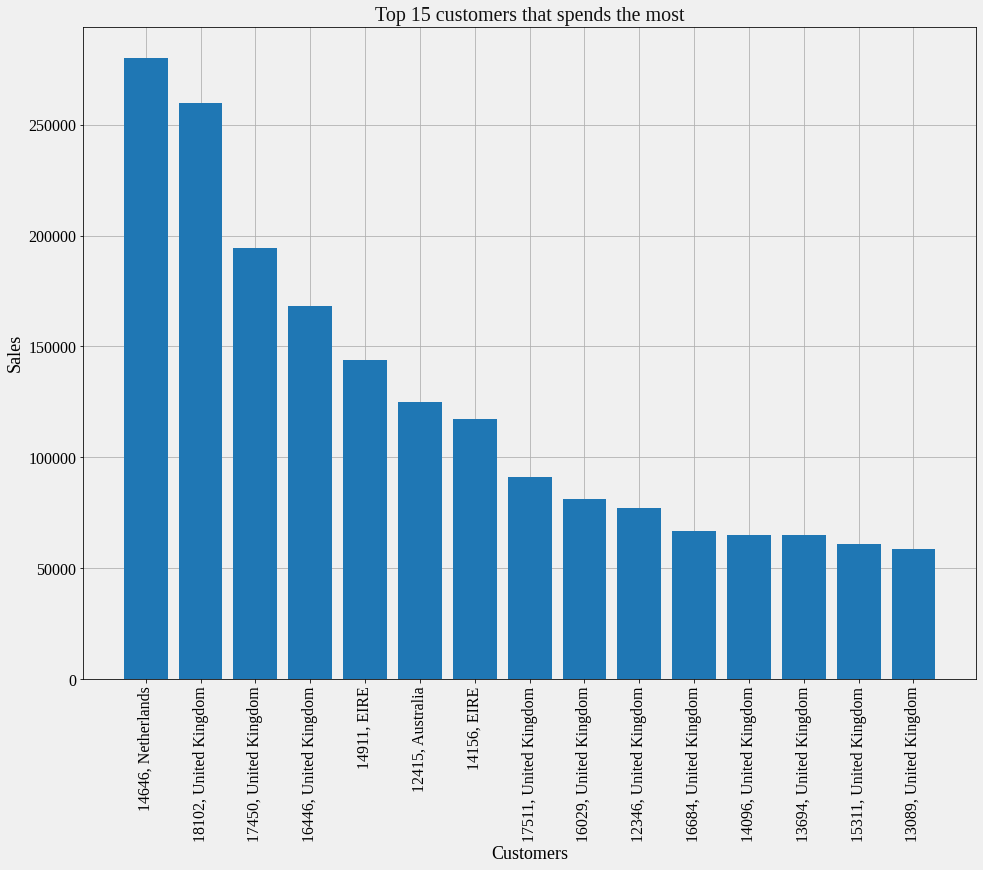

In [162]:
temp_df = customer_country(df)

fig, ax = make_bar(
    temp_df, "customer id", "sales", 
    [
        "Customers", "Sales", "Top 15 customers that spends the most"
    ], figsize=(16,12), filename="../plots/10_top_15_cust.jpg", iscus=True
)

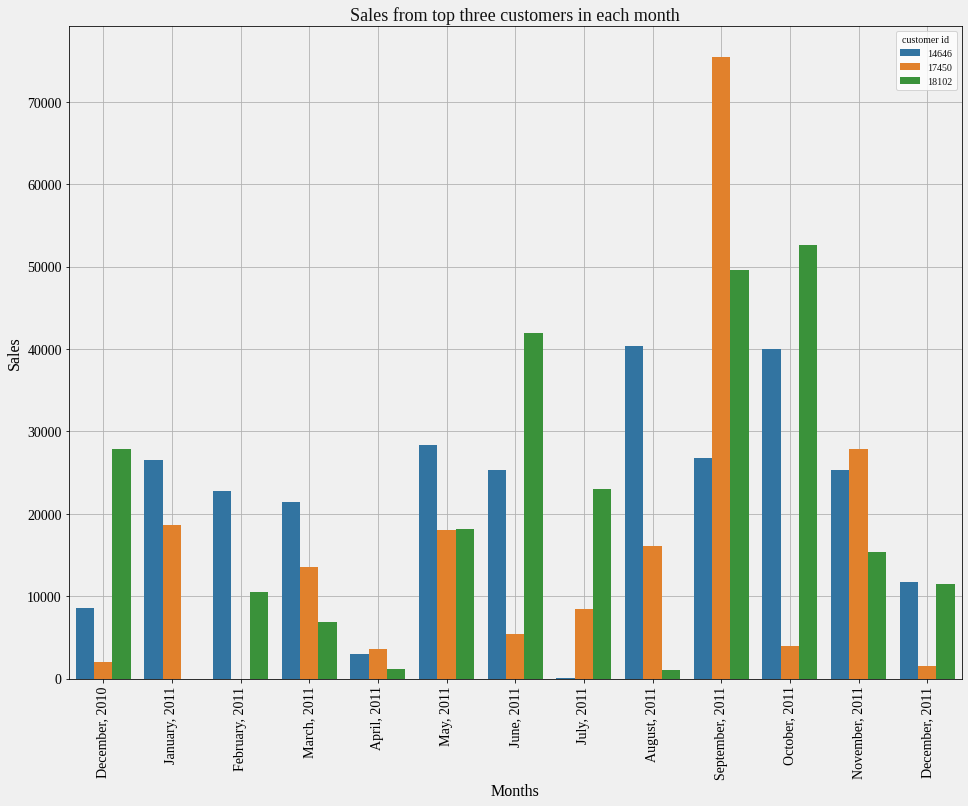

In [50]:
fig, ax = top_cust(
    df, figsize=(16,12), filename="../plots/11_sales_top3.jpg"
)

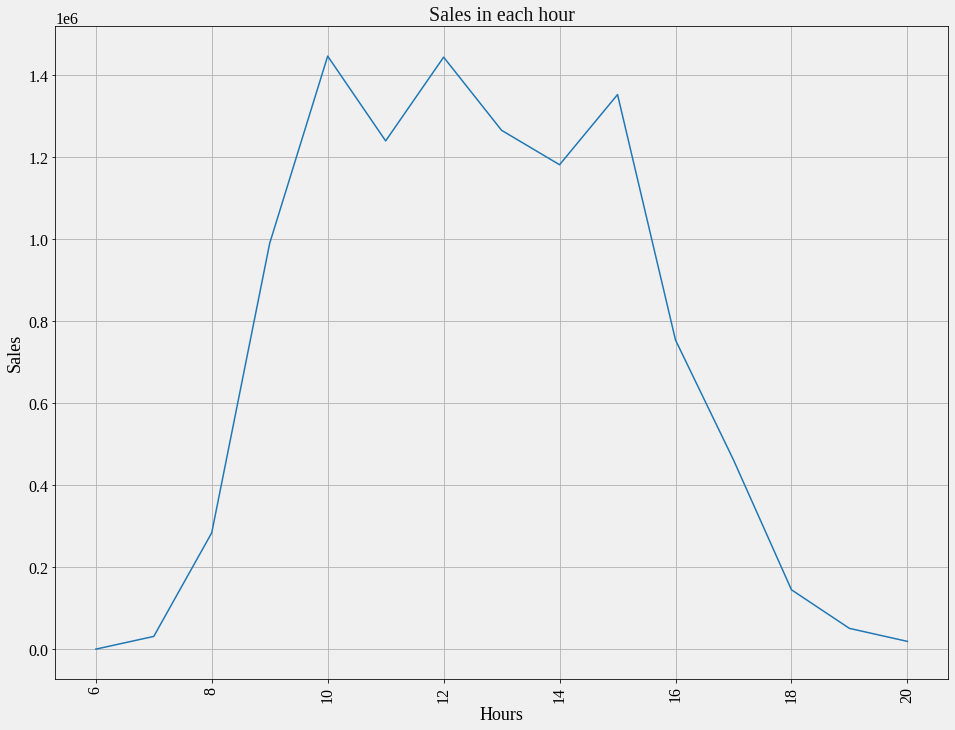

In [69]:
fig, ax = make_bar(
    df, "hour", "sales",
    [
        "Hours", "Sales", "Sales in each hour"
    ], 
    filename="../plots/12_sales_hour.jpg",
    figsize=(16,12), isline=True
)

In [26]:
%run ../src/utils_viz.py
%run ../src/utils_io.py

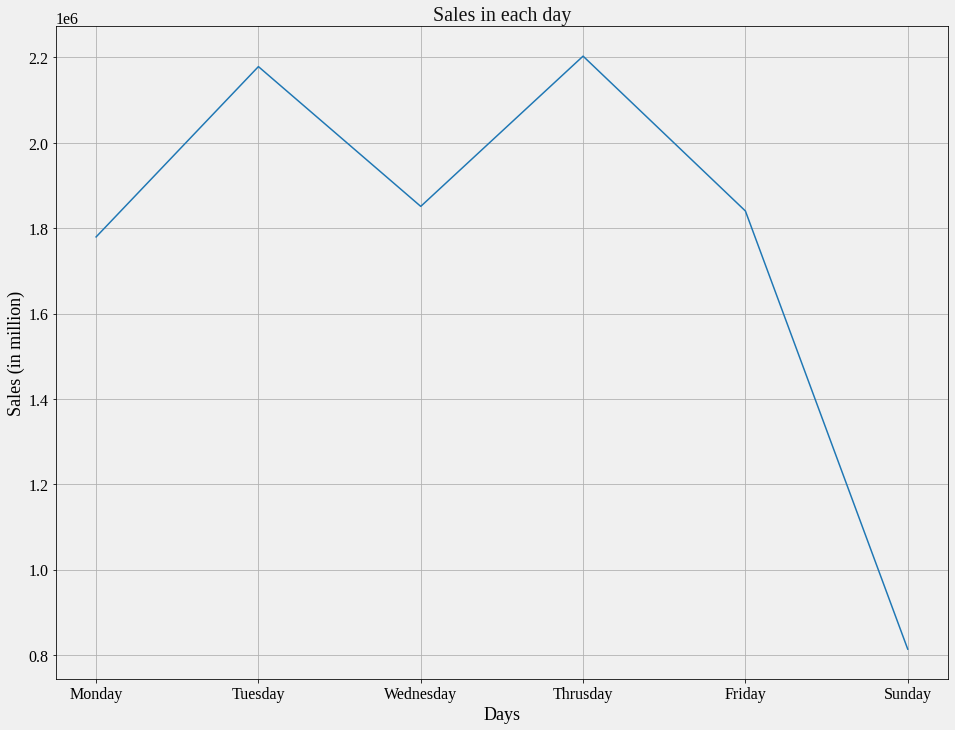

In [27]:
fig, ax = make_bar(df, "day_name", "sales", labels=[], figsize=(16,12),
                   filename="../plots/13_sales_in_each_day.jpg",
                   isline=True)

TypeError: cannot unpack non-iterable NoneType object

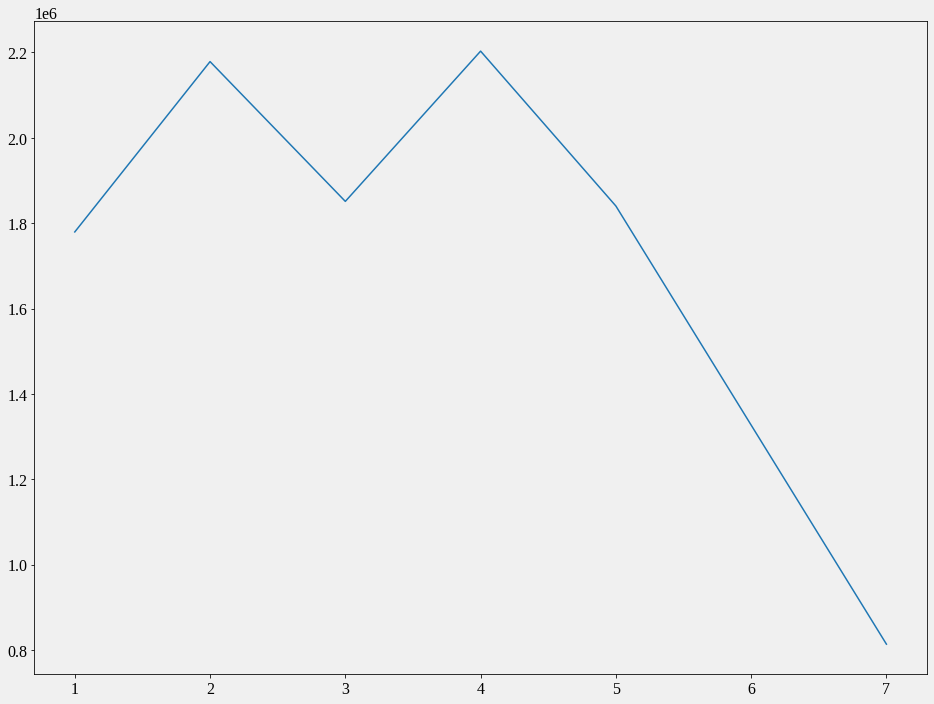

In [14]:
fig, ax = make_bar(
    df, "day_name", "sales",
    [
        "day", "Sales", "Sales in each day"
    ], figsize=(16,12), isline=True
)

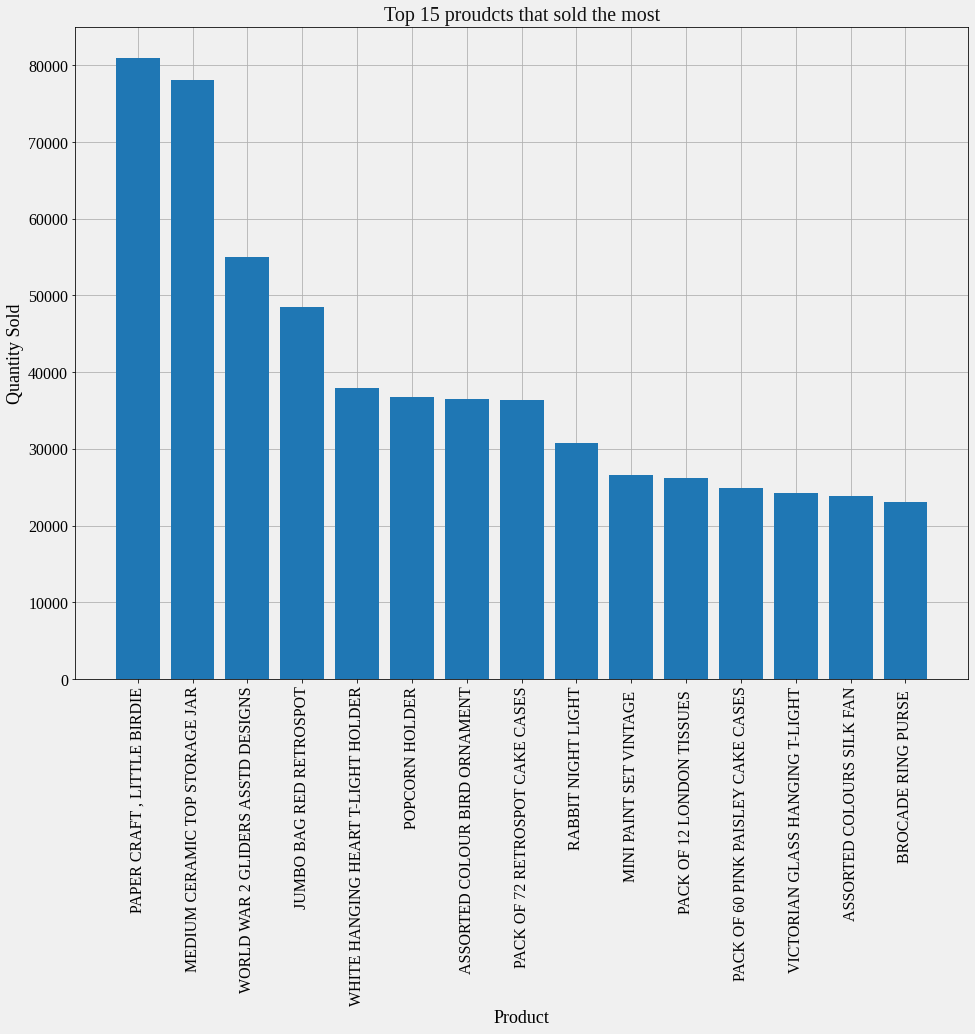

In [198]:
fig, ax = make_bar(
    df, "product description", "quantity sold",
    [
        "Product", "Quantity Sold", "Top 15 proudcts that sold the most"
    ],
    figsize=(16,12), filename="../plots/14_top15_products.jpg"
)

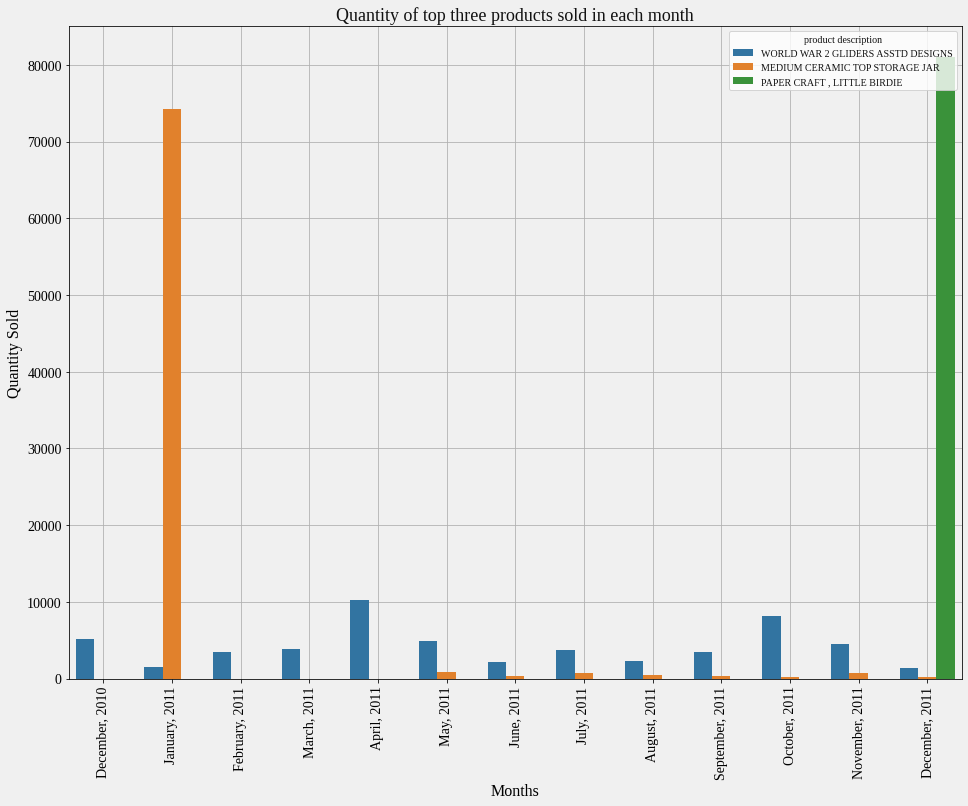

In [204]:
fig, ax, d = top_cust(
    df, isproduct=True, figsize=(16,12), filename="../plots/15_quantity_top.jpg"
)